In [42]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [43]:
import pandas as pd
import numpy as np 

df=pd.read_csv('../data/Titanic_cleaned.csv')
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Title_Mr,Title_Mrs,Title_Rare,Embarked_Q,Embarked_S,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Middle,AgeGroup_Senior,FareBand
0,0,3,0,22.0,1,0,7.2500,2,0,1,0,0,0,1,0,1,0,0,1
1,1,1,1,38.0,1,0,71.2833,2,0,0,1,0,0,0,0,1,0,0,4
2,1,3,1,26.0,0,0,7.9250,1,1,0,0,0,0,1,0,1,0,0,2
3,1,1,1,35.0,1,0,53.1000,2,0,0,1,0,0,1,0,1,0,0,4
4,0,3,0,35.0,0,0,8.0500,1,1,1,0,0,0,1,0,1,0,0,2


In [49]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_lr = logreg.predict(X_test)  

C:\ANACONDA\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
y_proba_lr = logreg.predict_proba(X_test)[:, 1] 

In [51]:
from utils import get_accuracy, get_confusion_matrix, get_classification_report, get_roc_auc, get_pr_auc, plot_roc_curve, plot_pr_curve

In [52]:
print("Accuracy:", get_accuracy(y_test, y_pred_lr))
print("Confusion Matrix:\n", get_confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", get_classification_report(y_test, y_pred_lr))
print("ROC-AUC:", get_roc_auc(y_test, y_proba_lr))
print("PR-AUC:", get_pr_auc(y_test, y_proba_lr))

Accuracy: 0.8169491525423729
Confusion Matrix:
 [[153  22]
 [ 32  88]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       175
           1       0.80      0.73      0.77       120

    accuracy                           0.82       295
   macro avg       0.81      0.80      0.81       295
weighted avg       0.82      0.82      0.82       295

ROC-AUC: 0.8925238095238095
PR-AUC: 0.8645386027389192


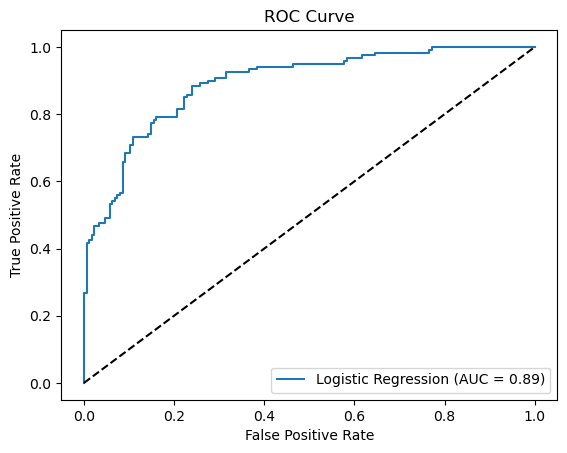

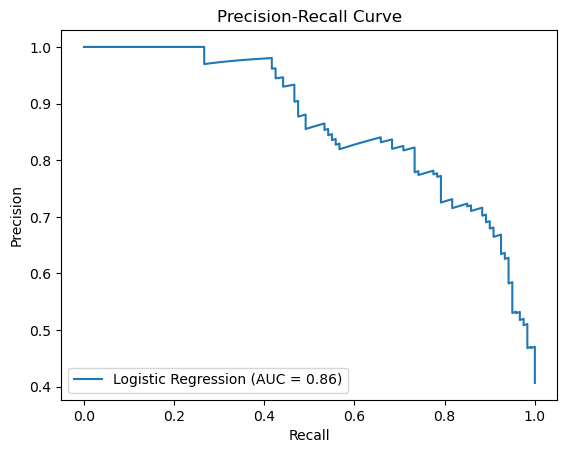

In [53]:
plot_roc_curve(y_test, y_proba_lr, model_name="Logistic Regression")
plot_pr_curve(y_test, y_proba_lr, model_name="Logistic Regression")